In [1]:
#Sankey plots
import os
os.chdir('/home/fsboedij/Data/MouseAtlas/')
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
import scanpy as sc

In [2]:
adata = sc.read("Data/Integration/Step10_fulladata_final_0411.h5ad")
adata

AnnData object with n_obs × n_vars = 773732 × 44793
    obs: 'Group', 'cell_type', 'Mice', 'new_cell_type', 'study', 'age', 'sample', 'sex', 'samples', 'strain', 'platform', 'Disease', 'treatment', 'tissue', 'time', 'Sample', 'Sex', 'Strain', 'Age', 'Treatment', 'Platform', 'hash.ID', 'SampleIDs', 'new.Celltypes', 'day', 'barcode', 'geo', 'healthy_or_disease', 'predictions', 'leiden_1', 'leiden_2', 'leiden_3', 'leiden_4', 'Level_1', 'Level_2', 'Level_3', 'Level_4', 'Level_5', 'knn_L4', 'predictions_healthydisease', 'knn_L4_clean', 'subset', 'doublets', 'inf1', 'inf2', 'inf12', 'Infections', 'Viral', 'Viral_ct', 'Level_2_5', 'Smoke', 'Smoking', 'Milopy_smoke', 'sample_oor', 'nhood_ixs_random', 'nhood_ixs_refined', 'nhood_kth_distance', 'Diff_Exp', 'Pseudo', 'combined_category', 'smoking_ct', 'pseudobulk_sample', 'total_counts', 'percent.mt'
    var: 'features-1'
    uns: 'Level_1_colors', 'Level_2_5_colors', 'Level_2_colors', 'Level_3_colors', 'Level_4_colors', 'Level_5_colors', 'Smoke_

In [6]:
len(adata.obs.Level_5.unique())

53

In [4]:
adata.obs['Level_1'].loc[(adata.obs['Level_1'].isin(['Multiciliated_Deuterosomal']))]='Epithelial'
adata.obs['Level_1'] = adata.obs['Level_1'].cat.remove_unused_categories()

adata.obs.Level_1.value_counts()

Immune         561543
Endothelial    103736
Epithelial      78059
Stroma          30394
Name: Level_1, dtype: int64

In [22]:
adata.obs['Level_4'] = adata.obs['Level_5']
adata.obs.Level_4=adata.obs['Level_4'].astype(object)

adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'cd103+ cd11b+ proliferating cDC')|\
	(adata.obs['Level_5']== 'cd11b+ cDC')|(adata.obs['Level_5']== 'cd103+ cd11b- cDC')|\
	(adata.obs['Level_5']== 'pDC')] = 'Dendritic cells'

adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Th2 cells')|\
	(adata.obs['Level_5']== 'Cd4 T cells')|
    (adata.obs['Level_4']=='Ccl5+ T cells')] = 'Cd4 T cells'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Ptprc+ fibroblast')\
	] = 'Fibroblast'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Pf4+ general capillary')\
	] = 'General capillary'

adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Rps4+ granulocyte')\
	] = 'Granulocyte'

adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating alveolar macrophages')\
	] = 'Alveolar macrophages'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating B cells')\
	] = 'B cells'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating interstitial macrophages')\
	] = 'Interstitial macrophages'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating NK cells')\
	] = 'NK cells'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating neutrophils')\
	] = 'Neutrophils'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating venous endothelial')\
	] = 'Venous endothelial'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating progenitor endothelial')\
	] = 'Progenitor endothelial'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating monocytes')\
	] = 'Non-classical monocyte'
adata.obs['Level_4'].loc[(adata.obs['Level_5']== 'Proliferating plasma')|\
	(adata.obs['Level_5']== 'IgM plasma')|(adata.obs['Level_5']== 'IgA plasma')\
	] = 'Plasma cells'

adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced aerocyte capillary']))]='Aerocyte capillary'
adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced club_goblet']))]='Club_Goblet'
adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced dendritic cells']))]='Dendritic cells'
adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced granulocyte']))]='Granulocyte'
adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced interstitial macrophages']))]='Interstitial macrophages'
adata.obs['Level_4'].loc[(adata.obs['Level_4'].isin(['Smoke induced smooth muscle cells']))]='Smooth muscle cells'
adata.obs['Level_4'].loc[(adata.obs['Level_4']== 'Viral induced alveolar macrophages')] = 'Alveolar macrophages'
adata.obs['Level_4'].loc[(adata.obs['Level_4']== 'Viral induced interstitial macrophages')] = 'Interstitial macrophages'
adata.obs['Level_4'].loc[(adata.obs['Level_4']== 'Viral induced granulocyte')] = 'Granulocyte'
adata.obs['Level_4'].loc[(adata.obs['Level_4']== 'Viral induced monocytes')] = 'Non-classical monocyte'
column = "Level_4"

# Compute value counts and filter out labels with 0 occurrences
valid_categories = adata.obs[column].value_counts()
valid_categories = valid_categories[valid_categories > 0].index

# Filter the DataFrame to include only rows with valid categories
adata.obs[column] = pd.Categorical(
    adata.obs[column],
    categories=valid_categories
)

# Remove unused categories from the column (optional)
adata.obs[column] = adata.obs[column].cat.remove_unused_categories()

# Check the updated value counts
print(adata.obs[column].value_counts())


/tmp/ipykernel_1551217/103182811.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/103182811.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/103182811.py:11: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/103182811.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pand

Cd4 T cells                   129614
B cells                       116486
General capillary              72652
AT II epithelial               56406
Non-classical monocyte         53893
Granulocyte                    48641
Interstitial macrophages       40950
NK cells                       40675
Alveolar macrophages           36188
Cd8 T cells                    30992
Classical monocyte             21812
Dendritic cells                21314
Fibroblast                     19524
Aerocyte capillary             15074
Venous endothelial              8746
Club_Goblet                     8345
AT I epithelial                 7145
Proliferating T cells           6812
Multiciliated_Deuterosomal      6163
Smooth muscle cells             5849
Plasma cells                    4587
Migratory dendritic             4269
Neutrophils                     3125
Progenitor endothelial          2741
Mesothelium                     2512
Pericyte                        2509
Lymphatic endothelial           2357
M

In [7]:
adata.obs.Level_4.value_counts()

Cd4 T cells                   129614
B cells                       116486
General capillary              72652
AT II epithelial               56406
Granulocyte                    48641
Interstitial macrophages       40950
Monocytes                      40761
NK cells                       40675
Alveolar macrophages           36188
Cd8 T cells                    30992
Classical monocyte             21812
Dendritic cells                21314
Fibroblast                     19524
Aerocyte capillary             15074
Non-classical monocyte         13132
Venous endothelial              8746
Club_Goblet                     8345
AT I epithelial                 7145
Proliferating T cells           6812
Multiciliated_Deuterosomal      6163
Smooth muscle cells             5849
Plasma cells                    4587
Migratory dendritic             4269
Neutrophils                     3125
Progenitor endothelial          2741
Mesothelium                     2512
Pericyte                        2509
L

In [15]:
adata.obs['Level_3'] = adata.obs['Level_4']
adata.obs.Level_3=adata.obs.Level_3.astype(object)

#adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Alveolar macrophages')|\
#	(adata.obs['Level_4']== 'Interstitial macrophages')] = 'Macrophages'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Classical monocyte')|\
	(adata.obs['Level_4']== 'Non-classical monocyte')] = 'Monocytes'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Cd4 T cells')|\
	(adata.obs['Level_4']== 'Cd8 T cells')|(adata.obs['Level_4']== 'Proliferating T cells')\
	] = 'T cell lineage'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Aerocyte capillary')|\
	(adata.obs['Level_4']== 'General capillary')] = 'Capillary endothelial'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Arterial endothelial')|\
	(adata.obs['Level_4']== 'Progenitor endothelial')] = 'Capillary endothelial'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Proliferating plasma')|\
	(adata.obs['Level_4']== 'IgM plasma')|(adata.obs['Level_4']== 'IgA plasma')\
	] = 'Plasma cells'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Pericyte')] = 'Fibroblast'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Club_Goblet')|\
	(adata.obs['Level_4']== 'Goblet')] = 'Secretory'

adata.obs['Level_3'].loc[(adata.obs['Level_4']== 'Classical monocyte')|\
	(adata.obs['Level_4']== 'Non-classical monocyte')] = 'Monocytes'

adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced aerocyte capillary')] = 'Capillary endothelial'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced club_goblet')] = 'Secretory'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced dendritic cells')] = 'Dendritic cells'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced granulocyte')] = 'Granulocyte'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced interstitial macrophages')] = 'Interstitial macrophages'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Smoke induced smooth muscle cells')] = 'Smooth muscle cells'


adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Viral induced alveolar macrophages')] = 'Alveolar macrophages'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Viral induced interstitial macrophages')] = 'Interstitial macrophages'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Viral induced granulocyte')] = 'Granulocyte'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Viral induced monocytes')] = 'Monocytes'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Mast cells')] = 'Granulocyte'

adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Mast cells')] = 'Granulocyte'
adata.obs['Level_3'].loc[(adata.obs['Level_3']== 'Neutrophils')] = 'Granulocyte'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Migratory dendritic')] = 'Dendritic cells'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Lymphatic endothelial')] = 'Capillary endothelial'
adata.obs['Level_3'].loc[(adata.obs['Level_5']== 'Mesothelium')] = 'Fibroblast'

/tmp/ipykernel_1551217/200025869.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/200025869.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/200025869.py:14: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/200025869.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [18]:
adata.obs.Level_3.value_counts()

T cell lineage                167418
B cells                       116486
Capillary endothelial          94989
Monocytes                      75705
AT II epithelial               56406
Granulocyte                    53952
Interstitial macrophages       40950
NK cells                       40675
Alveolar macrophages           36188
Dendritic cells                25583
Fibroblast                     24545
Venous endothelial              8746
Secretory                       8345
AT I epithelial                 7145
Multiciliated_Deuterosomal      6163
Smooth muscle cells             5849
Plasma cells                    4587
Name: Level_3, dtype: int64

In [16]:
adata.obs['Level_2'] = adata.obs['Level_3']

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'Interstitial macrophages')|\
	(adata.obs['Level_2']== 'Alveolar macrophages')|(adata.obs['Level_2']== 'Monocyte')|\
	(adata.obs['Level_2']== 'Dendritic cells')|(adata.obs['Level_2']== 'Mast cells')|\
	(adata.obs['Level_2']== 'Granulocyte')	|(adata.obs['Level_2']== 'pDC')|(adata.obs['Level_2']== 'Viral induced alveolar macrophages')|\
	(adata.obs['Level_2']== 'Migratory dendritic')|(adata.obs['Level_2']== 'Non-classical monocyte')|\
	(adata.obs['Level_2']== 'Viral induced Gran')|(adata.obs['Level_2']== 'Neutrophils')|\
	(adata.obs['Level_2']== 'Viral induced monocytes')|	(adata.obs['Level_2']== 'Monocytes')|(adata.obs['Level_2']== 'Viral induced interstitial macrophages')|\
	(adata.obs['Level_2']== 'Macrophages')] = 'Myeloid'	

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'B cells')|\
	(adata.obs['Level_2']== 'NK cells')|(adata.obs['Level_2']== 'Cd8+ T cells')|\
	(adata.obs['Level_2']== 'Plasma cells')|(adata.obs['Level_2']== 'Cd4+ T cells')|\
	(adata.obs['Level_2']== 'Th2 cells')|(adata.obs['Level_2']== 'Immature B')|\
	(adata.obs['Level_2']== 'Proliferating B')|(adata.obs['Level_2']== 'T cell lineage')\
	] = 'Lymphoid'

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'Vascular endothelial cells')|\
	(adata.obs['Level_2']== 'Capillary endothelial cells')|\
	(adata.obs['Level_2']== 'Vcam1+ endothelial cells')|\
	(adata.obs['Level_2']== 'Capillary endothelial')|\
	(adata.obs['Level_2']== 'Mesenchymal cell')|(adata.obs['Level_2']== 'Megakaryocyte')|\
	(adata.obs['Level_2']== 'Venous endothelial')|
	(adata.obs['Level_2']== 'Lymphatic endothelial')] = 'Blood vessels'

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'Enriched epithelial')|\
	(adata.obs['Level_2']== 'AT I epithelial')|(adata.obs['Level_2']== 'Epithelial cells')|\
	(adata.obs['Level_2']== 'AT II epithelial')|(adata.obs['Level_2']== 'Club_Goblet')|\
	(adata.obs['Level_2']== 'Secretory')|(adata.obs['Level_2']== 'Goblet')|\
    (adata.obs['Level_2']== 'AT2 cluster')] = 'Alveolar epithelium'

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'Lipofibroblast')|\
	(adata.obs['Level_2']== 'Mesothelium')|(adata.obs['Level_2']== 'SMC population')|\
	(adata.obs['Level_2']== 'Smooth muscle cells')|(adata.obs['Level_2']== 'Adventitial fibroblasts')|\
	(adata.obs['Level_2']== 'Vascular smooth muscle cells')|\
	(adata.obs['Level_2']== 'Viral induced fibroblast')|(adata.obs['Level_2']== 'Pericyte')\
	] = 'Fibroblast'

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'IgG plasma')|\
	(adata.obs['Level_2']== 'IgM plasma')|(adata.obs['Level_2']== 'IgA plasma')] = 'Plasma cells'

adata.obs['Level_2'].loc[(adata.obs['Level_2']== 'Multiciliated_Deuterosomal')|\
	(adata.obs['Level_2']== 'Cycling Basal')] = 'Airway epithelium'	


/tmp/ipykernel_1551217/2348209054.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/2348209054.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/2348209054.py:19: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/2348209054.py:27: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https:/

In [20]:
adata.obs.Level_2.value_counts()

Lymphoid               329166
Myeloid                232378
Blood vessels          103735
Alveolar epithelium     71896
Fibroblast              30394
Airway epithelium        6163
Name: Level_2, dtype: int64

In [17]:
adata.obs['Level_1'] = adata.obs['Level_2']
adata.obs['Level_1'].loc[(adata.obs['Level_2']== 'Airway epithelium')|\
	(adata.obs['Level_2']== 'Alveolar epithelium')] = 'Epithelial'	
adata.obs['Level_1'].loc[(adata.obs['Level_2']== 'Lymphoid')|\
	(adata.obs['Level_2']== 'Myeloid')] = 'Immune'	
adata.obs['Level_1'].loc[(adata.obs['Level_2']== 'Blood vessels')|\
	(adata.obs['Level_2']== 'Lymphatic endothelial')] = 'Endothelial'	
adata.obs['Level_1'].loc[(adata.obs['Level_2']== 'Fibroblast')] = 'Stroma'	
adata.obs.Level_1.value_counts()

/tmp/ipykernel_1551217/1503006252.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/1503006252.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/1503006252.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_1551217/1503006252.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

Immune         561544
Endothelial    103735
Epithelial      78059
Stroma          30394
Name: Level_1, dtype: int64

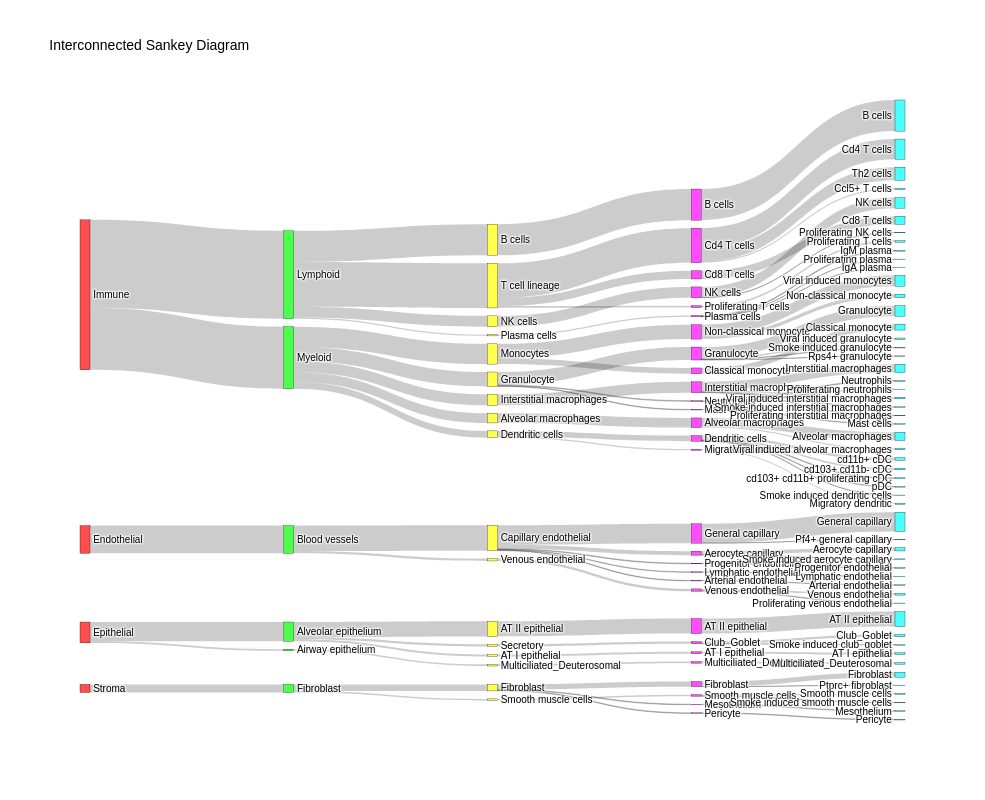

In [23]:
import pandas as pd
import plotly.graph_objects as go
levels = ['Level_1', 'Level_2', 'Level_3', 'Level_4', 'Level_5']

#levels = ['Level_1', 'Level_2', 'Level_3']

# Define colors for each level
level_colors = {
    'Level_1': 'rgba(255, 0, 0, 0.7)',    # Red
    'Level_2': 'rgba(0, 255, 0, 0.7)',    # Green
    'Level_2_5': 'rgba(0, 0, 255, 0.7)',  # Blue
    'Level_3': 'rgba(255, 255, 0, 0.7)',  # Yellow
    'Level_4': 'rgba(255, 0, 255, 0.7)',  # Purple
    'Level_5': 'rgba(0, 255, 255, 0.7)'   # Cyan
}

# Initialize dictionaries and data structures
node_labels = {}
level_counts = {}
flows = {}
node_x = {}

# Calculate counts for each level and store labels
for level in levels:
    level_counts[level] = adata.obs[level].value_counts()
    # Sort the labels based on the order of the index
    node_labels[level] = level_counts[level].index.tolist()

# Create a Plotly Sankey diagram
fig = go.Figure()

# Initialize lists to store node labels
node_labels_list = []

# Initialize lists to store links
source_nodes = []
target_nodes = []
values = []
link_labels = []

# Loop through each pair of source and target levels
for i in range(len(levels) - 1):
    source_level = levels[i]
    target_level = levels[i + 1]
    
    # Calculate flow values between levels iteratively
    source_counts = level_counts[source_level]
    target_counts = level_counts[target_level]
    
    # Initialize the flow matrix
    flow_matrix = pd.DataFrame(index=source_counts.index, columns=target_counts.index, data=0)
    
    # Calculate flow values based on common cell types
    for source_label in source_counts.index:
        for target_label in target_counts.index:
            common_cells = ((adata.obs[source_level] == source_label) & (adata.obs[target_level] == target_label)).sum()
            flow_matrix.loc[source_label, target_label] = common_cells
    
    flows[(source_level, target_level)] = flow_matrix.values
    
    # Ensure flow_data is a DataFrame
    flow_data = flows[(source_level, target_level)]
    source_labels = node_labels[source_level]
    target_labels = node_labels[target_level]
    flow_matrix = pd.DataFrame(flow_data, index=source_labels, columns=target_labels)
    
    # Create unique identifiers for nodes
    source_node_offset = len(node_labels_list)
    target_node_offset = len(node_labels_list) + len(source_labels)
    
    # Loop through the flow matrix and add links to the list, excluding zero values
    for source_label, source_row in flow_matrix.iterrows():
        for target_label, flow_value in source_row.items():
            if flow_value != 0:
                # Define labels with level prefixes
                source_node_label = f"{source_level}_{source_label}"
                target_node_label = f"{target_level}_{target_label}"
                
                # Check if the labels already exist in node_labels_list
                if source_node_label not in node_labels_list:
                    node_labels_list.append(source_node_label)
                if target_node_label not in node_labels_list:
                    node_labels_list.append(target_node_label)
                
                source_node = node_labels_list.index(source_node_label)
                target_node = node_labels_list.index(target_node_label)
                
                source_nodes.append(source_node)
                target_nodes.append(target_node)
                values.append(flow_value)
                link_labels.append(target_label)

node_colors = []
for node in node_labels_list:
    level_key = "_".join(node.split('_')[:2])
    if level_key == 'Level_2':
        if "_".join(node.split('_')[:3]) == 'Level_2_5':
            node_colors.append(level_colors.get("_".join(node.split('_')[:3]), 'rgba(128, 128, 128, 0.7)'))  # Assign new color for Level_2_5
        else:
            node_colors.append(level_colors.get(level_key, 'rgba(128, 128, 128, 0.7)'))  # Assign color for Level_2
    else:
        node_colors.append(level_colors.get(level_key, 'rgba(128, 128, 128, 0.7)'))  # Assign color for other levels

cleaned_node_labels = ['_'.join(label.split('_')[2:]) for label in node_labels_list]


new_node_labels = ['_'.join(label.split('_')[1:]) if label.startswith('5') else label for label in cleaned_node_labels]


# Add the x position to the nodes in the Sankey diagram
fig.add_trace(
    go.Sankey(
        arrangement = 'freeform',
        node=dict(
            pad=15,
            thickness=10,
            line=dict(color="black", width=0.3),
            label=new_node_labels,
            color=node_colors
        ),
        link=dict(
            source=source_nodes,
            target=target_nodes,
            value=values,
            label=link_labels,
        ),
    )
)
fig.update_layout(
    title='Interconnected Sankey Diagram',
    font=dict(size=10, color='black'),
	width=1000, 
    height=800,
    #2600,2200
    #1500,2000
)
#fig.update_traces(domain_y=list([0,0.5]), selector=dict(type='sankey'))
#fig.write_image("Sankey_color_1-2-3_hlca.png")

#fig.write_image("Sankey_color_final.png")

fig.show()

import pickle
with open('/home/fsboedij/Data/MouseAtlas/figures/Sankey_final_0412.pkl', 'wb') as file:
    pickle.dump(fig, file)

#with open('/home/fsboedij/Data/MouseAtlas/figures/Sankey_final_0811.pkl','rb') as file:
 #   loaded_fig=pickle.load(file)

#import pickle
#with open('/home/fsboedij/Data/MouseAtlas/figures/Sankey_1-2-3_0811.pkl', 'wb') as file:
 #   pickle.dump(fig, file)


#with open(file_path, 'rb') as file:
#    loaded_fig = pickle.load(file)

#loaded_fig.show()

In [20]:
import pickle
with open('/home/fsboedij/Data/MouseAtlas/figures/Sankey_final_0811.pkl', 'wb') as file:
    pickle.dump(fig, file)

with open('/home/fsboedij/Data/MouseAtlas/figures/Sankey_final_0811.pkl','rb') as file:
    loaded_fig=pickle.load(file)


In [11]:
adata.obs.Level_4.value_counts()

Cd4 T cells                   129614
B cells                       116486
General capillary              72652
AT II epithelial               56406
Granulocyte                    48641
Interstitial macrophages       40950
Monocytes                      40761
NK cells                       40675
Alveolar macrophages           36188
Cd8 T cells                    30992
Classical monocyte             21812
Dendritic cells                21314
Fibroblast                     19524
Aerocyte capillary             15074
Non-classical monocyte         13132
Venous endothelial              8746
Club_Goblet                     8345
AT I epithelial                 7145
Proliferating T cells           6812
Multiciliated_Deuterosomal      6163
Smooth muscle cells             5849
Plasma cells                    4587
Migratory dendritic             4269
Neutrophils                     3125
Progenitor endothelial          2741
Mesothelium                     2512
Pericyte                        2509
L

In [12]:
print(adata.obs.Level_3.value_counts())

T cell lineage                167429
B cells                       116586
Capillary endothelial          94990
Monocytes                      75796
AT II epithelial               56406
Granulocyte                    53861
Interstitial macrophages       40950
NK cells                       40675
Alveolar macrophages           36189
Dendritic cells                25598
Fibroblast                     24545
Venous endothelial              8746
Secretory                       8345
AT I epithelial                 7145
Multiciliated_Deuterosomal      6163
Smooth muscle cells             5849
Plasma cells                    4459
Name: Level_3, dtype: int64


In [13]:
adata.write('Data/Integration/Step10_fulladata_final_0411.h5ad')

In [67]:
adata.obs['Level_2_5'] = adata.obs['Level_3']
adata.obs['Level_2_5'] = adata.obs['Level_2_5'].astype(object)

adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin(['Macrophages']))]=adata.obs.Level_4
adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin([ 'T cell lineage']))] = adata.obs.Level_4

adata.obs['Level_2_5'].loc[(adata.obs['Level_2_5'] == 'Proliferating T cells')\
	] = 'Cd4 T cells'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3']== 'Migratory dendritic')|\
	(adata.obs['Level_3']== 'pDC')] = 'Dendritic cells'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin([ 'Viral induced granulocyte','Mast cells','Neutrophils']))] = 'Granulocyte'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3']== 'Capillary endothelial')|\
	(adata.obs['Level_3']== 'Lymphatic endothelial')] = 'Capillary endothelial'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin([ 'Viral induced monocytes']))] = 'Monocytes'
adata.obs['Level_2_5'].loc[(adata.obs['Level_4'].isin([ 'Viral induced interstitial macrophages','Interstitial macrophages']))] = 'Interstitial macrophages'
adata.obs['Level_2_5'].loc[(adata.obs['Level_4'].isin(['Viral induced alveolar macrophages','Alveolar macrophage','Proliferating alveolar macrophages']))] = 'Alveolar macrophages'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin([ 'Smooth muscle cells','Mesothelium','Pericyte']))] = 'Fibroblast'
adata.obs['Level_2_5'].loc[(adata.obs['Level_3'].isin([ 'Plasma cells']))] = 'Other cells'


adata.obs.Level_2_5.value_counts()

/tmp/ipykernel_4133064/2613949570.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4133064/2613949570.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4133064/2613949570.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_4133064/2613949570.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pa

Cd4 T cells                   136435
B cells                       116586
Capillary endothelial          94990
Monocytes                      75796
AT II epithelial               56406
Granulocyte                    53861
Interstitial macrophages       40950
NK cells                       40675
Alveolar macrophages           36189
Cd8 T cells                    30994
Fibroblast                     30394
Dendritic cells                25598
Venous endothelial              8746
Secretory                       8345
AT I epithelial                 7145
Multiciliated_Deuterosomal      6163
Other cells                     4459
Name: Level_2_5, dtype: int64

In [68]:
adata.write('Data/Integration/Step10_fulladata_final_0411.h5ad')
print('adata saved')

adata saved
